In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from tabulate import tabulate


In [2]:
data = np.array([
    [-0.9, 81],
    [-0.7, 50],
    [-0.5, 35],
    [-0.3, 27],
    [-0.1, 26],
    [0.1, 60],
    [0.3, 106],
    [0.5, 189],
    [0.7, 318],
    [0.9, 520]
])

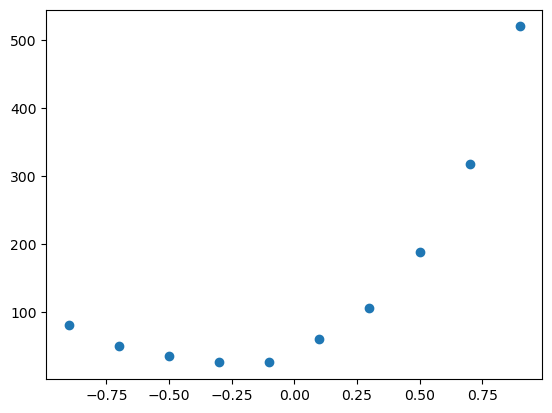

In [3]:
plt.plot(data[:, 0], data[:, 1], 'o')

In [4]:
# Add std deviation to data
sigma = np.sqrt(data[:, 1])
data = np.column_stack((data, sigma))
print(data)

[[-9.00000000e-01  8.10000000e+01  9.00000000e+00]
 [-7.00000000e-01  5.00000000e+01  7.07106781e+00]
 [-5.00000000e-01  3.50000000e+01  5.91607978e+00]
 [-3.00000000e-01  2.70000000e+01  5.19615242e+00]
 [-1.00000000e-01  2.60000000e+01  5.09901951e+00]
 [ 1.00000000e-01  6.00000000e+01  7.74596669e+00]
 [ 3.00000000e-01  1.06000000e+02  1.02956301e+01]
 [ 5.00000000e-01  1.89000000e+02  1.37477271e+01]
 [ 7.00000000e-01  3.18000000e+02  1.78325545e+01]
 [ 9.00000000e-01  5.20000000e+02  2.28035085e+01]]


Text(0.5, 1.0, 'Polynomial fits')

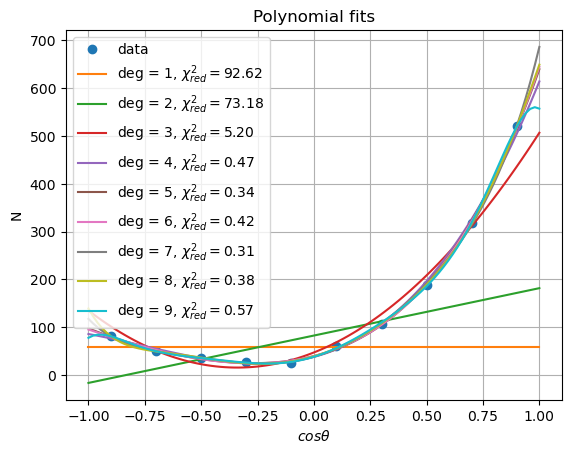

In [5]:
# Fit Polynomials
def polynomial(x, params):
    res = 0
    for i in range(len(params)):
        res += params[i]*x**i
    return res

def X_sq_polynomial(params):
    frac = (data[:, 1] - polynomial(data[:, 0], params))/data[:,2]
    return np.sum(frac**2)

def red_X_sq_polynomial(params):
    return X_sq_polynomial(params)/(len(data) - len(params))


x = np.linspace(-1,1,100)
plt.plot(data[:, 0], data[:, 1], 'o', label='data')

# try multiple degrees
opt_par = {}
red_X_sq = {}
for deg in range(1, 10):
    x0 = np.random.random(deg)
    parameters = minimize(X_sq_polynomial, x0).x
    opt_par[deg] = parameters
    red_X_sq[deg] = red_X_sq_polynomial(parameters)
    # print(red_X_sq[deg], parameters)
    plt.plot(x, polynomial(x, parameters), label=fr'{deg = }, $\chi^2_{{red}}=${red_X_sq[deg]:.2f}')

plt.legend()
plt.xlabel(r"$cos\theta$")
plt.ylabel("N")
plt.grid()
plt.title("Polynomial fits")

    
    

Text(0.5, 1.0, 'Legendre fits')

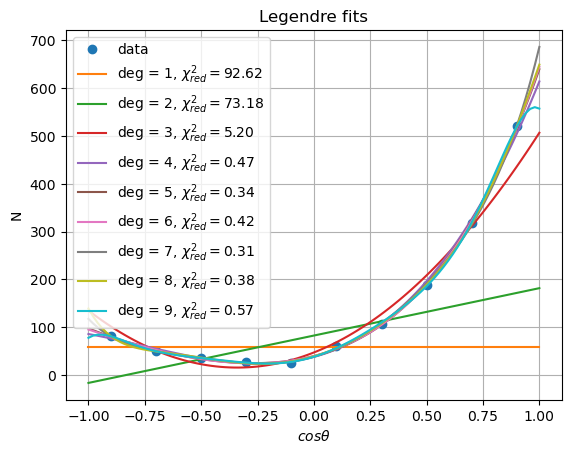

In [14]:
# Legendre Polynomials
def p_l(x, l):
    if l==0:
        return np.ones_like(x)
    if l==1:
        return x
    return 1/l * ( 
                  (2*l-1)*x*p_l(x,l-1)
                  - (l-1) * p_l(x,l-2) 
                  )

def legendre(x, params):
    res = 0
    for i in range(len(params)):
        res += params[i]*p_l(x,i)
    return res


def X_sq_legendre(params):
    frac = (data[:, 1] - legendre(data[:, 0], params))/data[:,2]
    return np.sum(frac**2)

def red_X_sq_legendre(params):
    return X_sq_legendre(params)/(len(data) - len(params))


x = np.linspace(-1,1,100)
plt.plot(data[:, 0], data[:, 1], 'o', label='data')

# try multiple degrees
opt_par_l = {}
red_X_sq_l = {}
for deg in range(1, 10):
    x0 = np.random.random(deg)
    parameters = minimize(X_sq_legendre, x0).x
    opt_par_l[deg] = parameters
    red_X_sq_l[deg] = red_X_sq_legendre(parameters)
    # print(red_X_sq[deg], parameters)
    plt.plot(x, legendre(x, parameters), label=fr'{deg = }, $\chi^2_{{red}}=${red_X_sq_l[deg]:.2f}')

plt.legend()
plt.xlabel(r"$cos\theta$")
plt.ylabel("N")
plt.grid()
plt.title("Legendre fits")


In [12]:
from tabulate import tabulate

# Values
table = []
for deg in range(1, 10):
    table.append([deg, X_sq_polynomial(opt_par[deg]), red_X_sq[deg], X_sq_legendre(opt_par_l[deg]), red_X_sq_l[deg]])

# Create the table with consistent column widths
table_str = tabulate(table, headers=("Grad", "χ^2 Polyn.", "red. χ^2 Polyn.", "χ^2 Legendre", "red. χ^2 Legendre"), floatfmt=".4f", colalign=("center", "right", "right", "right", "right"))

print(table_str)

 Grad     χ^2 Polyn.    red. χ^2 Polyn.    χ^2 Legendre    red. χ^2 Legendre
------  ------------  -----------------  --------------  -------------------
  1         833.5475            92.6164        833.5475              92.6164
  2         585.4487            73.1811        585.4487              73.1811
  3          36.4096             5.2014         36.4096               5.2014
  4           2.8499             0.4750          2.8499               0.4750
  5           1.6860             0.3372          1.6860               0.3372
  6           1.6626             0.4157          1.6626               0.4157
  7           0.9355             0.3118          0.9355               0.3118
  8           0.7684             0.3842          0.7684               0.3842
  9           0.5662             0.5662          0.5662               0.5662


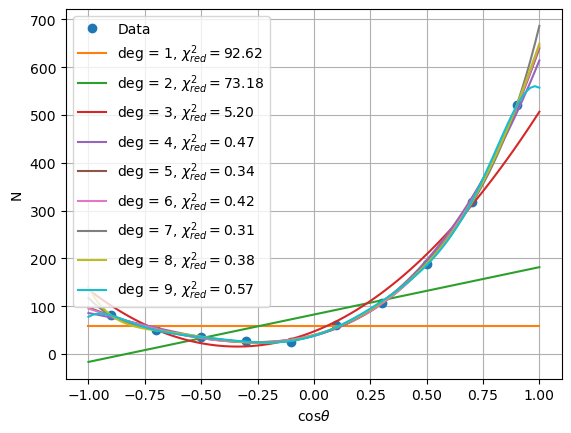

In [ ]:
# Solve Polynomials using LGS
plt.plot(data[:,0], data[:,1], marker="o", linestyle="", label="Data")

for deg in range(1,10):
    A = np.zeros((deg,deg))
    b = np.zeros(deg)
    
    for i in range(deg):
        for j in range(deg):
            A[i,j] = np.sum( (data[:,0]**i * data[:,0]**j)/data[:,1] )
            
        b[i] = np.sum(data[:,0]**i)
        
    a = np.linalg.solve(A, b)
    
    plt.plot(x, polynomial(x,a), label=fr"{deg = }, $\chi^2_{{red}}=${red_X_sq_polynomial(a):.2f}")
    

plt.xlabel(fr"cos$\theta$")
plt.ylabel("N")
plt.legend()
plt.grid()

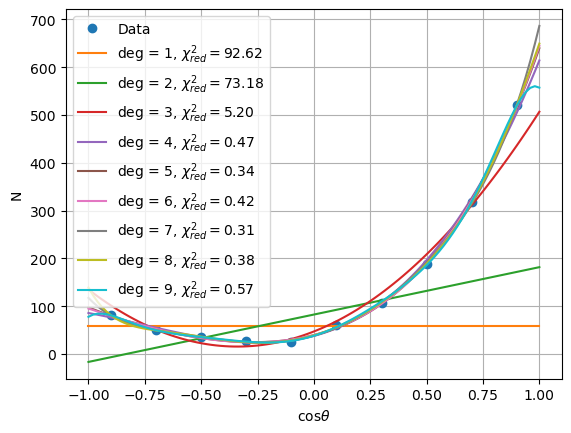

In [19]:
# Legendre Fit using LGS

plt.plot(data[:,0], data[:,1], marker="o", linestyle="", label="Data")

for deg in range(1,10):
    A = np.zeros((deg,deg))
    b = np.zeros(deg)
    
    for i in range(deg):
        for j in range(deg):
            A[i,j] = np.sum( (p_l(data[:,0],i) * p_l(data[:,0],j) )/data[:,1] )
            
        b[i] = np.sum(data[:,1]*p_l(data[:,0],i)/data[:,1])
        
    a = np.linalg.solve(A, b)
    
    plt.plot(x, legendre(x,a), label=fr"{deg = }, $\chi^2_{{red}}=${red_X_sq_legendre(a):.2f}")
    

plt.xlabel(fr"cos$\theta$")
plt.ylabel("N")
plt.legend()
plt.grid()